In [1]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/

In [2]:
!kaggle datasets download -d salader/dogs-vs-cats

100% 1.06G/1.06G [00:08<00:00, 252MB/s]
100% 1.06G/1.06G [00:08<00:00, 139MB/s]


In [3]:
import zipfile
zip_ref =zipfile.ZipFile('/content/dogs-vs-cats.zip','r')
zip_ref.extractall('/content')
zip_ref.close()

In [4]:
import tensorflow as tf
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense,Conv2D,MaxPooling2D,Flatten,BatchNormalization,Dropout


In [5]:
# gernerators
train_ds = keras.utils.image_dataset_from_directory(
    directory = '/content/train',
    labels='inferred',
    label_mode ='int',
    batch_size= 32,
    image_size =(256,256)

)
validation_ds = keras.utils.image_dataset_from_directory(
    directory='/content/test',
    labels='inferred',
    label_mode='int',
    batch_size=32,
    image_size=(256,256)
)


Found 20000 files belonging to 2 classes.
Found 5000 files belonging to 2 classes.


In [6]:
#normalize
def process(image,label):
  image =tf.cast(image/255. ,tf.float32)
  return image,label

train_ds = train_ds.map(process)
validation_ds = validation_ds.map(process)

In [8]:
# create CNN model
model=Sequential()

model.add(Conv2D(32,kernel_size=(3,3),padding ='valid',activation='relu', input_shape=(256,256,3)))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Conv2D(64,kernel_size=(3,3),padding ='valid',activation='relu', input_shape=(256,256,3)))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Conv2D(128,kernel_size=(3,3),padding ='valid',activation='relu', input_shape=(256,256,3)))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Flatten())

model.add(Dense(128,activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(64,activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(1,activation='sigmoid'))

In [9]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 254, 254, 32)      896       
                                                                 
 batch_normalization_3 (Bat  (None, 254, 254, 32)      128       
 chNormalization)                                                
                                                                 
 max_pooling2d_3 (MaxPoolin  (None, 127, 127, 32)      0         
 g2D)                                                            
                                                                 
 conv2d_4 (Conv2D)           (None, 125, 125, 64)      18496     
                                                                 
 batch_normalization_4 (Bat  (None, 125, 125, 64)      256       
 chNormalization)                                                
                                                      

In [10]:
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [ ]:
history = model.fit(train_ds,epochs=10,validation_data=validation_ds)

Epoch 1/10
625/625 [==============================] - 76s 106ms/step - loss: 1.2905 - accuracy: 0.6018 - val_loss: 0.6235 - val_accuracy: 0.6482
Epoch 2/10
625/625 [==============================] - 67s 107ms/step - loss: 0.5464 - accuracy: 0.7253 - val_loss: 0.5133 - val_accuracy: 0.7414
Epoch 3/10
625/625 [==============================] - 67s 106ms/step - loss: 0.4916 - accuracy: 0.7693 - val_loss: 0.4963 - val_accuracy: 0.7538
Epoch 4/10
625/625 [==============================] - 67s 106ms/step - loss: 0.4205 - accuracy: 0.8087 - val_loss: 0.4677 - val_accuracy: 0.7772
Epoch 5/10
625/625 [==============================] - 64s 102ms/step - loss: 0.3520 - accuracy: 0.8448 - val_loss: 0.4555 - val_accuracy: 0.7958
Epoch 6/10
625/625 [==============================] - 63s 100ms/step - loss: 0.2726 - accuracy: 0.8883 - val_loss: 0.4559 - val_accuracy: 0.8062
Epoch 7/10
625/625 [==============================] - 63s 100ms/step - loss: 0.2057 - accuracy: 0.9165 - val_loss: 0.8110 - val_ac

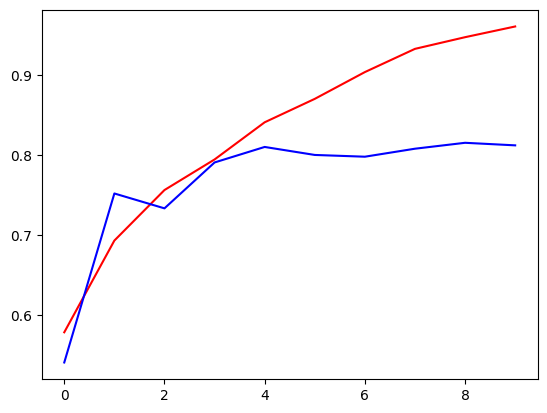

In [ ]:
import matplotlib.pyplot as plt
plt.plot(history.history['accuracy'],color='red',label='train')
plt.plot(history.history['val_accuracy'],color='blue',label='validation')


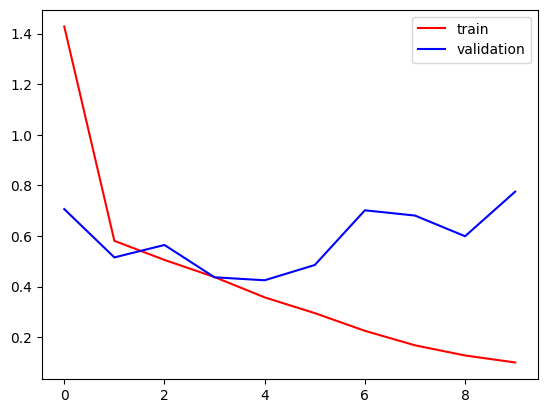

In [ ]:
plt.plot(history.history['loss'],color='red',label='train')
plt.plot(history.history['val_loss'],color='blue',label='validation')
plt.legend()
plt.show()